In [61]:
import pandas as pd
import re
from timeit import default_timer as timer
import numpy as np

# Steps
### 1. add needed columns to the original dataframe
### 2. create output 1 by grouping and aggregating
### 3. add days it took to ship to original dataframe

In [41]:
df = pd.read_csv('PD 2021 Wk 2 Input - Bike Model Sales.csv')
df

,Bike Type,Store,Order Date,Quantity,Value per Bike,Shipping Date,Model
0,Mountain,Manchester,15/05/2020,4,1543,01/06/2020,GIA31292/003
1,Gravel,Manchester,16/06/2020,2,2076,24/06/2020,GIA21312/001
2,Road,Birmingham,04/05/2020,1,2616,13/05/2020,GIA94221/129
3,Gravel,York,05/09/2020,2,1359,19/09/2020,GIA12442/120
4,Gravel,Birmingham,28/03/2020,4,1599,04/04/2020,GIA12492/123
...,...,...,...,...,...,...,...
1995,Road,Manchester,02/06/2020,2,3504,20/06/2020,102SPEC84233
1996,Mountain,York,07/09/2020,2,1109,21/09/2020,012SPEC93591
1997,Road,London,10/12/2020,3,1032,11/12/2020,943SPEC24922
1998,Gravel,London,10/02/2020,2,2303,11/02/2020,429SPEC21322


### 1. add needed columns

#### <span style="color:gray">some possible solutions to extract Brand</span>.
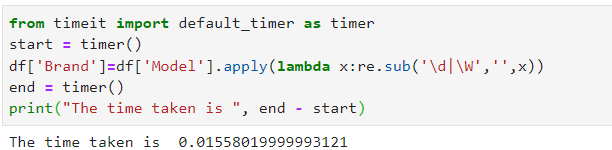
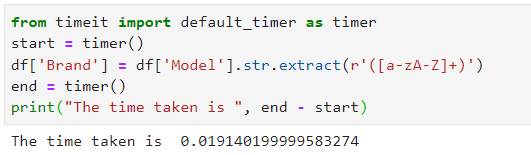
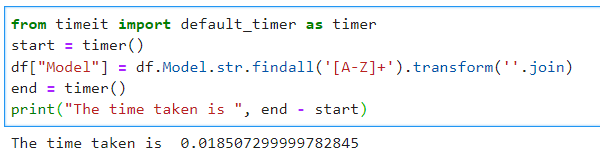

In [42]:
# extract the brand column
from timeit import default_timer as timer
start = timer()
df['Brand']=df['Model'].apply(lambda x:re.sub('\d|\W','',x))
end = timer()
print("The time taken is ", end - start)

The time taken is  0.00795180001296103


In [43]:
df

,Bike Type,Store,Order Date,Quantity,Value per Bike,Shipping Date,Model,Brand
0,Mountain,Manchester,15/05/2020,4,1543,01/06/2020,GIA31292/003,GIA
1,Gravel,Manchester,16/06/2020,2,2076,24/06/2020,GIA21312/001,GIA
2,Road,Birmingham,04/05/2020,1,2616,13/05/2020,GIA94221/129,GIA
3,Gravel,York,05/09/2020,2,1359,19/09/2020,GIA12442/120,GIA
4,Gravel,Birmingham,28/03/2020,4,1599,04/04/2020,GIA12492/123,GIA
...,...,...,...,...,...,...,...,...
1995,Road,Manchester,02/06/2020,2,3504,20/06/2020,102SPEC84233,SPEC
1996,Mountain,York,07/09/2020,2,1109,21/09/2020,012SPEC93591,SPEC
1997,Road,London,10/12/2020,3,1032,11/12/2020,943SPEC24922,SPEC
1998,Gravel,London,10/02/2020,2,2303,11/02/2020,429SPEC21322,SPEC


In [44]:
df['Order Value'] = df['Quantity'] * df['Value per Bike']

### 2. create output 1 by grouping and aggregating

In [45]:
df_output_1 = df.groupby(['Brand', 'Bike Type'], as_index=False).agg(Total_Sold=('Order Value','sum'), Total_Quantity=('Quantity','sum')).rename(columns=lambda x : x.replace('_', ' '))
df_output_1['Avg Bike Val per Brand per Type'] = df_output_1['Total Sold'] / df_output_1['Total Quantity']
df_output_1

,Brand,Bike Type,Total Sold,Total Quantity,Avg Bike Val per Brand per Type
0,BROM,Gravel,433885,186,2332.715054
1,BROM,Mountain,674770,277,2435.992780
2,BROM,Road,656539,257,2554.626459
3,GIA,Gravel,733087,323,2269.619195
4,GIA,Mountain,1021329,425,2403.127059
5,GIA,Road,896695,407,2203.181818
6,KONA,Gravel,791841,324,2443.953704
7,KONA,Mountain,820537,330,2486.475758
8,KONA,Road,647684,273,2372.468864
9,ORRO,Gravel,411644,151,2726.119205


### 3. add days it took to ship to original dataframe

In [62]:
# fix both date columns and get the days
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df['Shipping Date'] = pd.to_datetime(df['Shipping Date'], format='%d/%m/%Y')
df['Days to Ship'] = df['Shipping Date'].sub(df['Order Date'], axis=0)
df['Days to Ship'] = df['Days to Ship']/ np.timedelta64(1, 'D')
df

,Bike Type,Store,Order Date,Quantity,Value per Bike,Shipping Date,Model,Brand,Order Value,Days to Ship
0,Mountain,Manchester,2020-05-15,4,1543,2020-06-01,GIA31292/003,GIA,6172,17.0
1,Gravel,Manchester,2020-06-16,2,2076,2020-06-24,GIA21312/001,GIA,4152,8.0
2,Road,Birmingham,2020-05-04,1,2616,2020-05-13,GIA94221/129,GIA,2616,9.0
3,Gravel,York,2020-09-05,2,1359,2020-09-19,GIA12442/120,GIA,2718,14.0
4,Gravel,Birmingham,2020-03-28,4,1599,2020-04-04,GIA12492/123,GIA,6396,7.0
...,...,...,...,...,...,...,...,...,...,...
1995,Road,Manchester,2020-06-02,2,3504,2020-06-20,102SPEC84233,SPEC,7008,18.0
1996,Mountain,York,2020-09-07,2,1109,2020-09-21,012SPEC93591,SPEC,2218,14.0
1997,Road,London,2020-12-10,3,1032,2020-12-11,943SPEC24922,SPEC,3096,1.0
1998,Gravel,London,2020-02-10,2,2303,2020-02-11,429SPEC21322,SPEC,4606,1.0


### 4. get the secound output by groupby and aggregate

In [63]:
df_output_2 = df.groupby(['Brand', 'Store'], as_index=False).agg(Total_Sold=('Order Value','sum'), Total_Quantity=('Quantity','sum'), Average_Days_to_Ship=('Days to Ship','mean')).rename(columns=lambda x : x.replace('_', ' '))
df_output_2

,Brand,Store,Total Sold,Total Quantity,Average Days to Ship
0,BROM,Birmingham,349759,155,11.755556
1,BROM,Leeds,389116,150,9.833333
2,BROM,London,324635,133,10.976190
3,BROM,Manchester,339832,137,10.888889
4,BROM,York,361852,145,9.833333
5,GIA,Birmingham,581733,269,9.939024
6,GIA,Leeds,460151,203,11.192308
7,GIA,London,548821,228,10.736842
8,GIA,Manchester,466613,204,11.028169
9,GIA,York,593793,251,10.435294
